<a href="https://colab.research.google.com/github/shadmanshakib09/Machine-Learning-and-Deep-Learning/blob/main/Collect_data_from_web_scrapping__Machine_Learning_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Collected from:

https://companiesmarketcap.com/largest-companies-by-revenue/

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [14]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage = requests.get('https://companiesmarketcap.com/largest-companies-by-revenue/',headers=headers).text

In [15]:
soup=BeautifulSoup(webpage,'lxml')


In [16]:
# print(soup.prettify())

In [19]:
company = soup.find_all('div',class_='company-name')

In [20]:
len(company)

100

In [26]:
company_list = []
for i in company:
    # print(i.text.strip())
    company_list.append(i.text.strip())

In [27]:
len(company_list)

100

In [42]:
revenue = soup.find_all('td', class_='td-right')
revenue_list = []
for i in revenue:
    text = i.text.strip()
    if text.endswith('B'):
        revenue_list.append(text)


In [43]:
revenue_list

['$665.03 B',
 '$604.33 B',
 '$495.35 B',
 '$435.69 B',
 '$429.67 B',
 '$402.87 B',
 '$385.60 B',
 '$381.25 B',
 '$363.24 B',
 '$350.67 B',
 '$340.65 B',
 '$328.28 B',
 '$319.96 B',
 '$313.75 B',
 '$308.59 B',
 '$302.02 B',
 '$283.83 B',
 '$281.46 B',
 '$255.98 B',
 '$254.45 B',
 '$245.12 B',
 '$226.82 B',
 '$223.20 B',
 '$216.00 B',
 '$210.24 B',
 '$209.37 B',
 '$201.58 B',
 '$197.38 B',
 '$197.00 B',
 '$182.71 B',
 '$180.34 B',
 '$174.01 B',
 '$170.32 B',
 '$169.79 B',
 '$167.35 B',
 '$162.01 B',
 '$161.51 B',
 '$157.74 B',
 '$155.22 B',
 '$153.99 B',
 '$152.08 B',
 '$151.85 B',
 '$149.78 B',
 '$147.79 B',
 '$147.65 B',
 '$142.72 B',
 '$141.02 B',
 '$140.06 B',
 '$134.24 B',
 '$133.95 B',
 '$133.59 B',
 '$132.41 B',
 '$128.42 B',
 '$125.71 B',
 '$125.35 B',
 '$122.24 B',
 '$122.19 B',
 '$121.53 B',
 '$121.11 B',
 '$112.93 B',
 '$112.03 B',
 '$111.03 B',
 '$110.86 B',
 '$107.85 B',
 '$107.30 B',
 '$105.08 B',
 '$104.81 B',
 '$104.14 B',
 '$103.96 B',
 '$101.32 B',
 '$98.89 B',
 '$98.3

In [44]:
len(revenue_list)

100

In [45]:
#concat two list
df = pd.DataFrame(list(zip(company_list,revenue_list)),columns=['Company','Revenue'])
df.head()

,Company,Revenue
0,Walmart,$665.03 B
1,Amazon,$604.33 B
2,Saudi Aramco,$495.35 B
3,Sinopec,$435.69 B
4,PetroChina,$429.67 B


In [46]:
df.shape

(100, 2)

In [49]:
#plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('deep')
#scatter


In [51]:
df.describe()

,Company,Revenue
count,100,100
unique,100,100
top,Walmart,$665.03 B
freq,1,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  100 non-null    object
 1   Revenue  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [53]:
df.isnull().sum()

,0
Company,0
Revenue,0


In [56]:
#cancelling $ from column 2
df['Revenue'] = df['Revenue'].str.replace('$','')

In [57]:
df.head()

,Company,Revenue
0,Walmart,665.03 B
1,Amazon,604.33 B
2,Saudi Aramco,495.35 B
3,Sinopec,435.69 B
4,PetroChina,429.67 B


In [58]:
df['Revenue'] = df['Revenue'].str.replace('B','')

In [60]:
df.head()

,Company,Revenue
0,Walmart,665.03
1,Amazon,604.33
2,Saudi Aramco,495.35
3,Sinopec,435.69
4,PetroChina,429.67


In [61]:
#set column name Revenue ($(B))
df.rename(columns={'Revenue':'Revenue($B)'},inplace=True)

In [62]:
df.head()

,Company,Revenue($B)
0,Walmart,665.03
1,Amazon,604.33
2,Saudi Aramco,495.35
3,Sinopec,435.69
4,PetroChina,429.67


In [67]:
#convert string value of col2 in int
df['Revenue($B)'] = df['Revenue($B)'].astype(float)
df.head()

,Company,Revenue($B)
0,Walmart,665.03
1,Amazon,604.33
2,Saudi Aramco,495.35
3,Sinopec,435.69
4,PetroChina,429.67


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      100 non-null    object 
 1   Revenue($B)  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [69]:
df.to_csv('largest_companies_by_revenue.csv',index=False)

In [72]:
df['Revenue($B)'].describe()

,Revenue($B)
count,100.000000
mean,178.023800
std,115.831237
min,87.440000
25%,97.082500
50%,133.770000
75%,209.587500
max,665.030000


<ipython-input-73-59c444918c71>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Revenue($B)'])


<Axes: xlabel='Revenue($B)', ylabel='Density'>

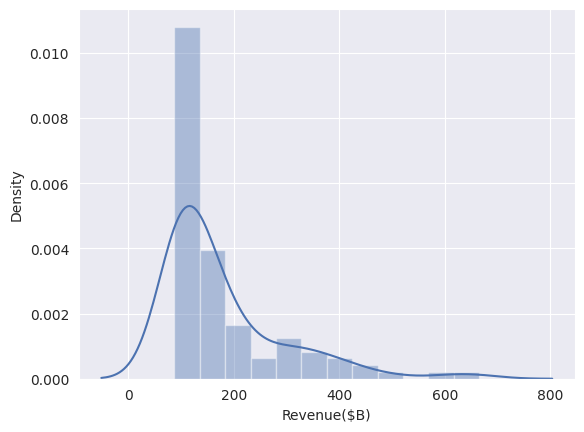

In [73]:
#dist plot
sns.distplot(df['Revenue($B)'])

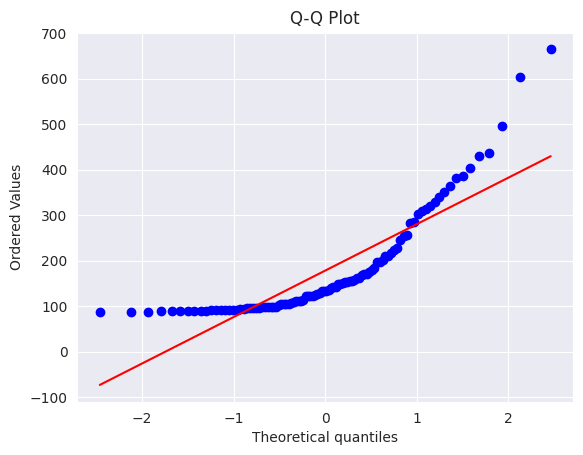

In [79]:
#q=q plot
# Generate Q-Q plot
import scipy.stats as stats
stats.probplot(df['Revenue($B)'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

<Axes: ylabel='Revenue($B)'>

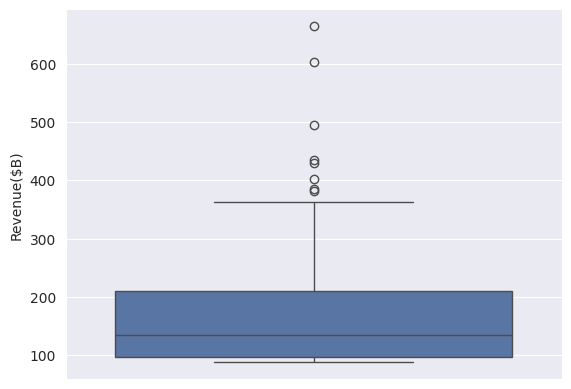

In [80]:
#boxplot
sns.boxplot(df['Revenue($B)'])

In [81]:
from scipy.stats import shapiro

stat, p = shapiro(df['Revenue($B)'])
print("Statistics =", stat, ", p-value =", p)

if p > 0.05:
    print("Data is normally distributed (fail to reject null hypothesis)")
else:
    print("Data is not normally distributed (reject null hypothesis)")

Statistics = 0.7558263744760865 , p-value = 1.3385274562910187e-11
Data is not normally distributed (reject null hypothesis)
